## Exercise 3

Go to https://statecancerprofiles.cancer.gov/incidencerates/index.php from the National Cancer Institute, search across the entire "area" of the United States at the "area type" resolution of By State, for all cancer sites, all races, all sexes, and all ages. Export the data (this will give you a CSV file).

Perform any necessary data cleaning (e.g. you'll probably want to get rid of the numbers in e.g. "Connecticut(7)" which refer to data source information as well as remove lines that aren't part of the table). Include the cleaned CSV file in your homework submission, and make sure your readme includes a citation of where the original data came from and how you changed the csv file. (5 points)

Using Flask, implement a server that provides three routes (5 points each):

 - @app.route("/")
the index/homepage written in HTML which prompts the user to enter a state and provides a button, which passes this information to /info
 - @app.route("/state/<string:name>")
an API that returns JSON-encoded data containing the name of the state and the age-adjusted incidence rate (cases per 100k)
NOTE: in this case, the name of the state is part of the URL itself; it is not passed in as a GET or POST argument 
 - @app.route("/info", methods=["GET"])
a web page that takes the name of the state as a GET argument and (1) if the state name is valid, displays the same information as the API above, but does so by putting it in an HTML page, or (2) displays an error if the state name is invalid (discuss what counts as valid and invalid in your readme; e.g. does capitalization matter?)
either way, include a link back to the homepage /
You've now completed most of this course, so you're now qualified to choose the next step. Take this exercise one step beyond that which is described above in a way that you think is appropriate, and discuss your extension in your readme. (e.g. you might show maps, or provide more data, or use CSS/JS to make the page prettier or more interactive, or use a database, or...) (5 points).

We will introduce Flask briefly at the beginning of the November 29th lecture. You might also want to check out CS50's lecture on Flask for more in-depth introduction: https://cs50.yale.edu/2022/fall/weeks/9/

If you wish, you may start with the code at https://github.com/ramcdougal/flask-example/ 

Since you're using GET, you'll want to use request.args.get("name") and not request.form.

## Response

Citation :
- National Cancer Institute. State Cancer Profile (2022). https://statecancerprofiles.cancer.gov/incidencerates/index.php. Accessed on 3rd December 2022. 
- Incidence data are provided by the National Program of Cancer RegistriesExternal Web Site Policy Cancer Surveillance System (NPCR-CSS), Centers for Disease Control and Prevention and by the National Cancer Institute's Surveillance, Epidemiology, and End Results (SEER)
- Population counts for denominators are based on Census populations as modified by NCI.
- Rates are calculated using SEER

In [31]:
import pandas as pd

In [32]:
##loading the raw dataset to do the cleaning

data = pd.read_csv("/Users/mahimakaur/Desktop/incd.csv", skiprows = 8)

In [33]:
data

,State,FIPS,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR)(1),0.0,449.4,449.1,449.7,N/A,N/A,N/A,1728431,stable,-0.9,-2.0,0.2
1,Kentucky(7),21000.0,516,513.2,518.8,1,1,1,27998,falling,-0.9,-1.8,-0.1
2,Iowa(7),19000.0,490.7,487.5,494,2,2,5,19110,rising,0.8,0.4,1.2
3,New Jersey(7),34000.0,488.9,487,490.8,3,2,5,53473,falling,-0.6,-0.7,-0.5
4,West Virginia(6),54000.0,487.4,483.3,491.4,4,2,8,12216,falling,-0.2,-0.4,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,8 Source: Incidence data provided by the SEER ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Interpret Rankings provides insight into inter...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Data not available [http://statecancerprofiles...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Data for the United States does not include da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data.head(5)

,State,FIPS,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR)(1),0.0,449.4,449.1,449.7,N/A,N/A,N/A,1728431,stable,-0.9,-2.0,0.2
1,Kentucky(7),21000.0,516,513.2,518.8,1,1,1,27998,falling,-0.9,-1.8,-0.1
2,Iowa(7),19000.0,490.7,487.5,494,2,2,5,19110,rising,0.8,0.4,1.2
3,New Jersey(7),34000.0,488.9,487,490.8,3,2,5,53473,falling,-0.6,-0.7,-0.5
4,West Virginia(6),54000.0,487.4,483.3,491.4,4,2,8,12216,falling,-0.2,-0.4,-0.1


In [35]:
data.tail(25)

,State,FIPS,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
49,Arizona(6),4000.0,382.4,380.6,384.3,49,49,49,33179,falling,-2.2,-3.9,-0.6
50,New Mexico(7),35000.0,374,370.6,377.5,50,50,50,9627,falling,-1.1,-1.3,-0.9
51,Puerto Rico(6),72001.0,368.2,365.4,370.9,N/A,N/A,N/A,14806,stable,-0.1,-1.3,1.2
52,Nevada(6),32000.0,data not available,data not available,data not available,N/A,N/A,N/A,data not available,data not available,data not available,data not available,data not available
53,Created by statecancerprofiles.cancer.gov on 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,State Cancer Registries may provide more curre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Trend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Rising when 95% confidence interval of aver...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Stable when 95% confidence interval of aver...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Falling when 95% confidence interval of ave...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
## Dropping the row from 53 to 73 as it contains no relevant data

data = data.drop(data.index[53:74])

In [37]:
data

,State,FIPS,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR)(1),0.0,449.4,449.1,449.7,N/A,N/A,N/A,1728431,stable,-0.9,-2.0,0.2
1,Kentucky(7),21000.0,516,513.2,518.8,1,1,1,27998,falling,-0.9,-1.8,-0.1
2,Iowa(7),19000.0,490.7,487.5,494,2,2,5,19110,rising,0.8,0.4,1.2
3,New Jersey(7),34000.0,488.9,487,490.8,3,2,5,53473,falling,-0.6,-0.7,-0.5
4,West Virginia(6),54000.0,487.4,483.3,491.4,4,2,8,12216,falling,-0.2,-0.4,-0.1
5,New York(7),36000.0,484.8,483.6,486.1,5,4,8,116044,falling,-0.6,-0.8,-0.4
6,Louisiana(7),22000.0,484.3,481.7,487,6,3,9,26426,stable,0.5,-0.3,1.3
7,Arkansas(6),5000.0,483.6,480.4,486.9,7,3,9,17906,stable,0.4,-0.5,1.4
8,New Hampshire(6),33000.0,482.9,478.2,487.7,8,2,11,8695,falling,-0.7,-0.9,-0.6
9,Pennsylvania(6),42000.0,476.8,475.3,478.3,9,9,13,80256,falling,-1.6,-3.2,-0.1


In [38]:
## to remove the numbers from the states 

data['State'] = data['State'].str.replace("\(\d\)","",regex = True)

In [39]:
data = data.rename(columns = {" FIPS": "FIPS"})

In [40]:
## Standarizing the FIPS Codes 

data['FIPS'] = (data['FIPS']/1000).map("{:,.0f}".format)

In [41]:
# Replace the (*) from Mississippi as Data Suppressed (as mentioned on the website)

data.iloc[:,-4:] = data.iloc[:,-4:].replace("*", "Data Suppressed")

In [42]:
data

,State,FIPS,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR),0,449.4,449.1,449.7,N/A,N/A,N/A,1728431,stable,-0.9,-2.0,0.2
1,Kentucky,21,516,513.2,518.8,1,1,1,27998,falling,-0.9,-1.8,-0.1
2,Iowa,19,490.7,487.5,494,2,2,5,19110,rising,0.8,0.4,1.2
3,New Jersey,34,488.9,487,490.8,3,2,5,53473,falling,-0.6,-0.7,-0.5
4,West Virginia,54,487.4,483.3,491.4,4,2,8,12216,falling,-0.2,-0.4,-0.1
5,New York,36,484.8,483.6,486.1,5,4,8,116044,falling,-0.6,-0.8,-0.4
6,Louisiana,22,484.3,481.7,487,6,3,9,26426,stable,0.5,-0.3,1.3
7,Arkansas,5,483.6,480.4,486.9,7,3,9,17906,stable,0.4,-0.5,1.4
8,New Hampshire,33,482.9,478.2,487.7,8,2,11,8695,falling,-0.7,-0.9,-0.6
9,Pennsylvania,42,476.8,475.3,478.3,9,9,13,80256,falling,-1.6,-3.2,-0.1


In [43]:
## We can also drop the row for the state Nevada since no data is available

data = data.drop(data.index[52])

In [44]:
data

,State,FIPS,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR),0,449.4,449.1,449.7,N/A,N/A,N/A,1728431,stable,-0.9,-2.0,0.2
1,Kentucky,21,516,513.2,518.8,1,1,1,27998,falling,-0.9,-1.8,-0.1
2,Iowa,19,490.7,487.5,494,2,2,5,19110,rising,0.8,0.4,1.2
3,New Jersey,34,488.9,487,490.8,3,2,5,53473,falling,-0.6,-0.7,-0.5
4,West Virginia,54,487.4,483.3,491.4,4,2,8,12216,falling,-0.2,-0.4,-0.1
5,New York,36,484.8,483.6,486.1,5,4,8,116044,falling,-0.6,-0.8,-0.4
6,Louisiana,22,484.3,481.7,487,6,3,9,26426,stable,0.5,-0.3,1.3
7,Arkansas,5,483.6,480.4,486.9,7,3,9,17906,stable,0.4,-0.5,1.4
8,New Hampshire,33,482.9,478.2,487.7,8,2,11,8695,falling,-0.7,-0.9,-0.6
9,Pennsylvania,42,476.8,475.3,478.3,9,9,13,80256,falling,-1.6,-3.2,-0.1


In [45]:
## saving the cleaned dataset 

data.to_csv('cleaned_cancer_data.csv', index= True)

## Flask Implementation

Note : The code is uploaded to the github as exercise3.py

In [46]:
from PIL import Image

In [47]:
try: 
    HomePage = Image.open("/Users/mahimakaur/Desktop/Computional Methods for Health Informatics/StateName.png") 
except IOError:
    pass

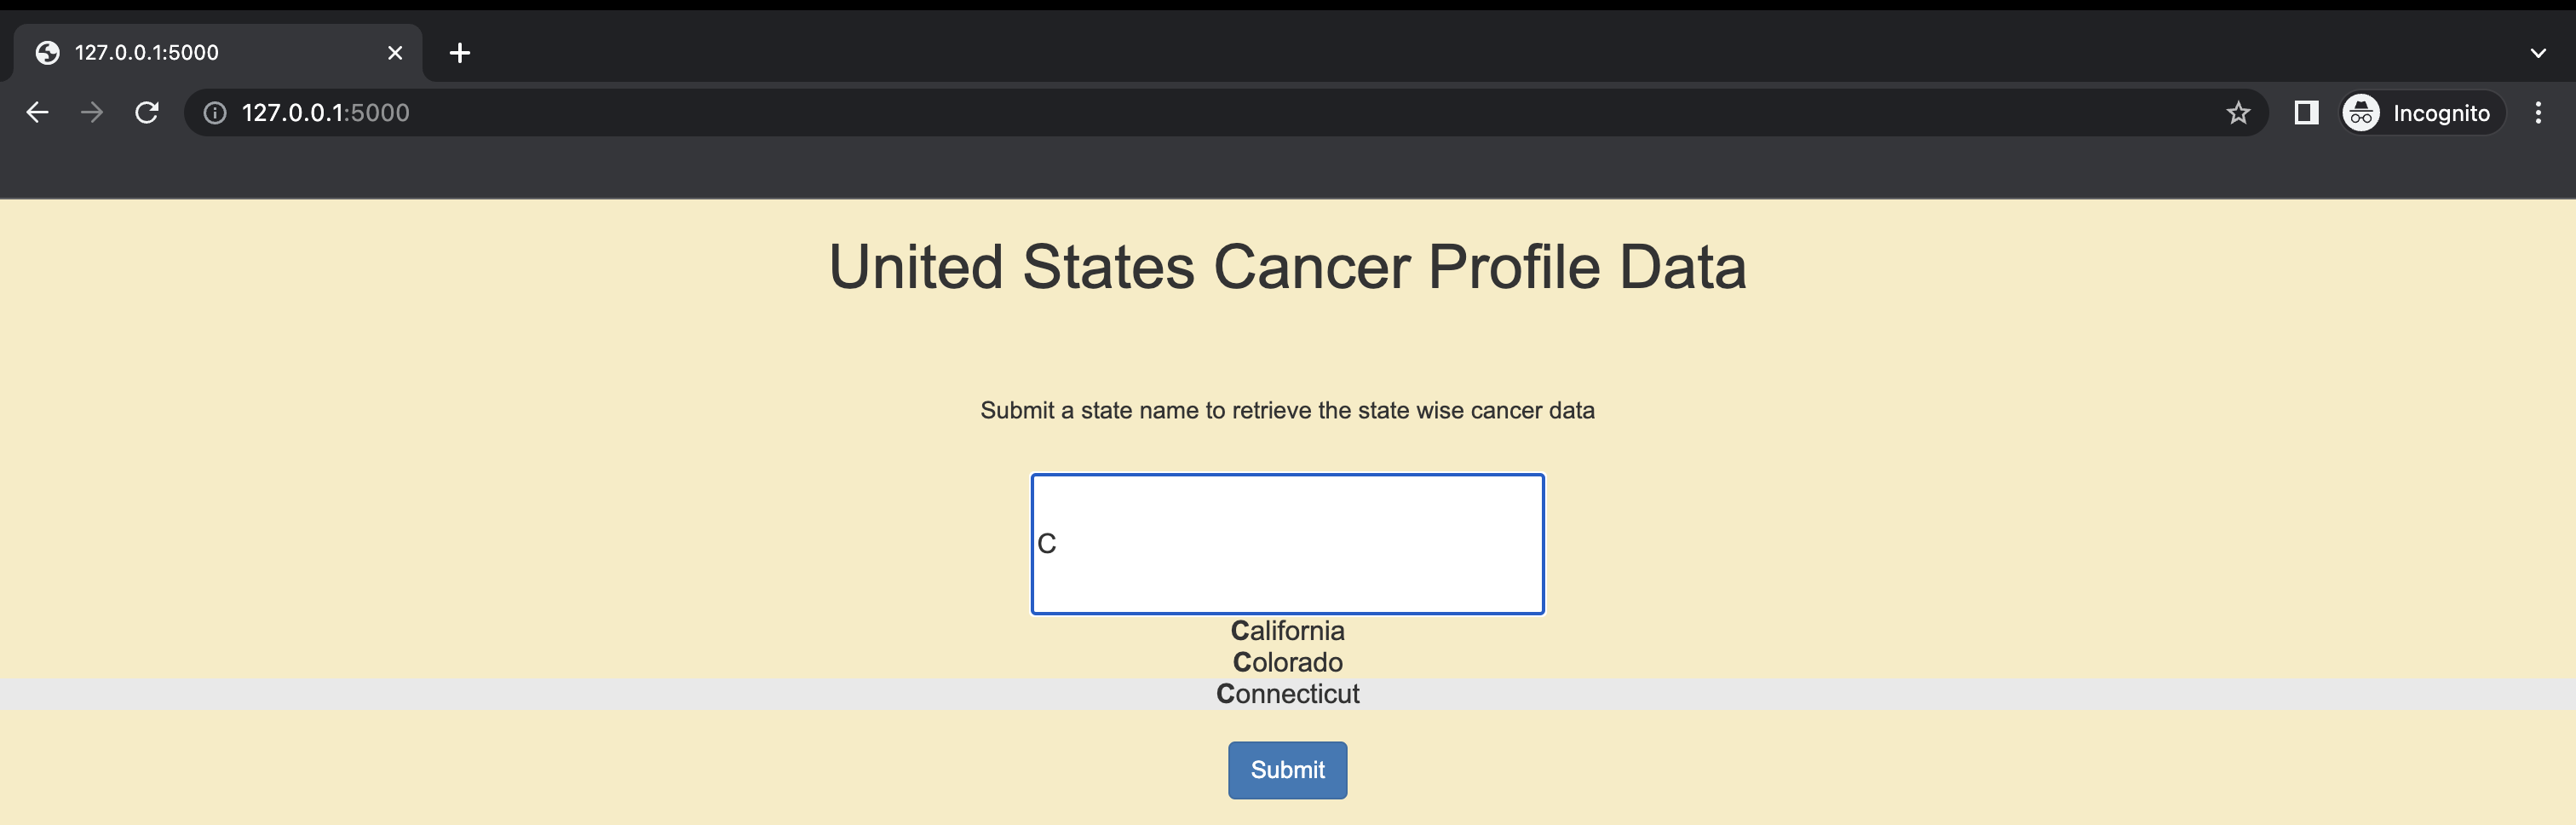

In [48]:
HomePage

In [49]:
try: 
    ErrorPage = Image.open("/Users/mahimakaur/Desktop/Computional Methods for Health Informatics/ErrorPage.png") 
except IOError:
    pass

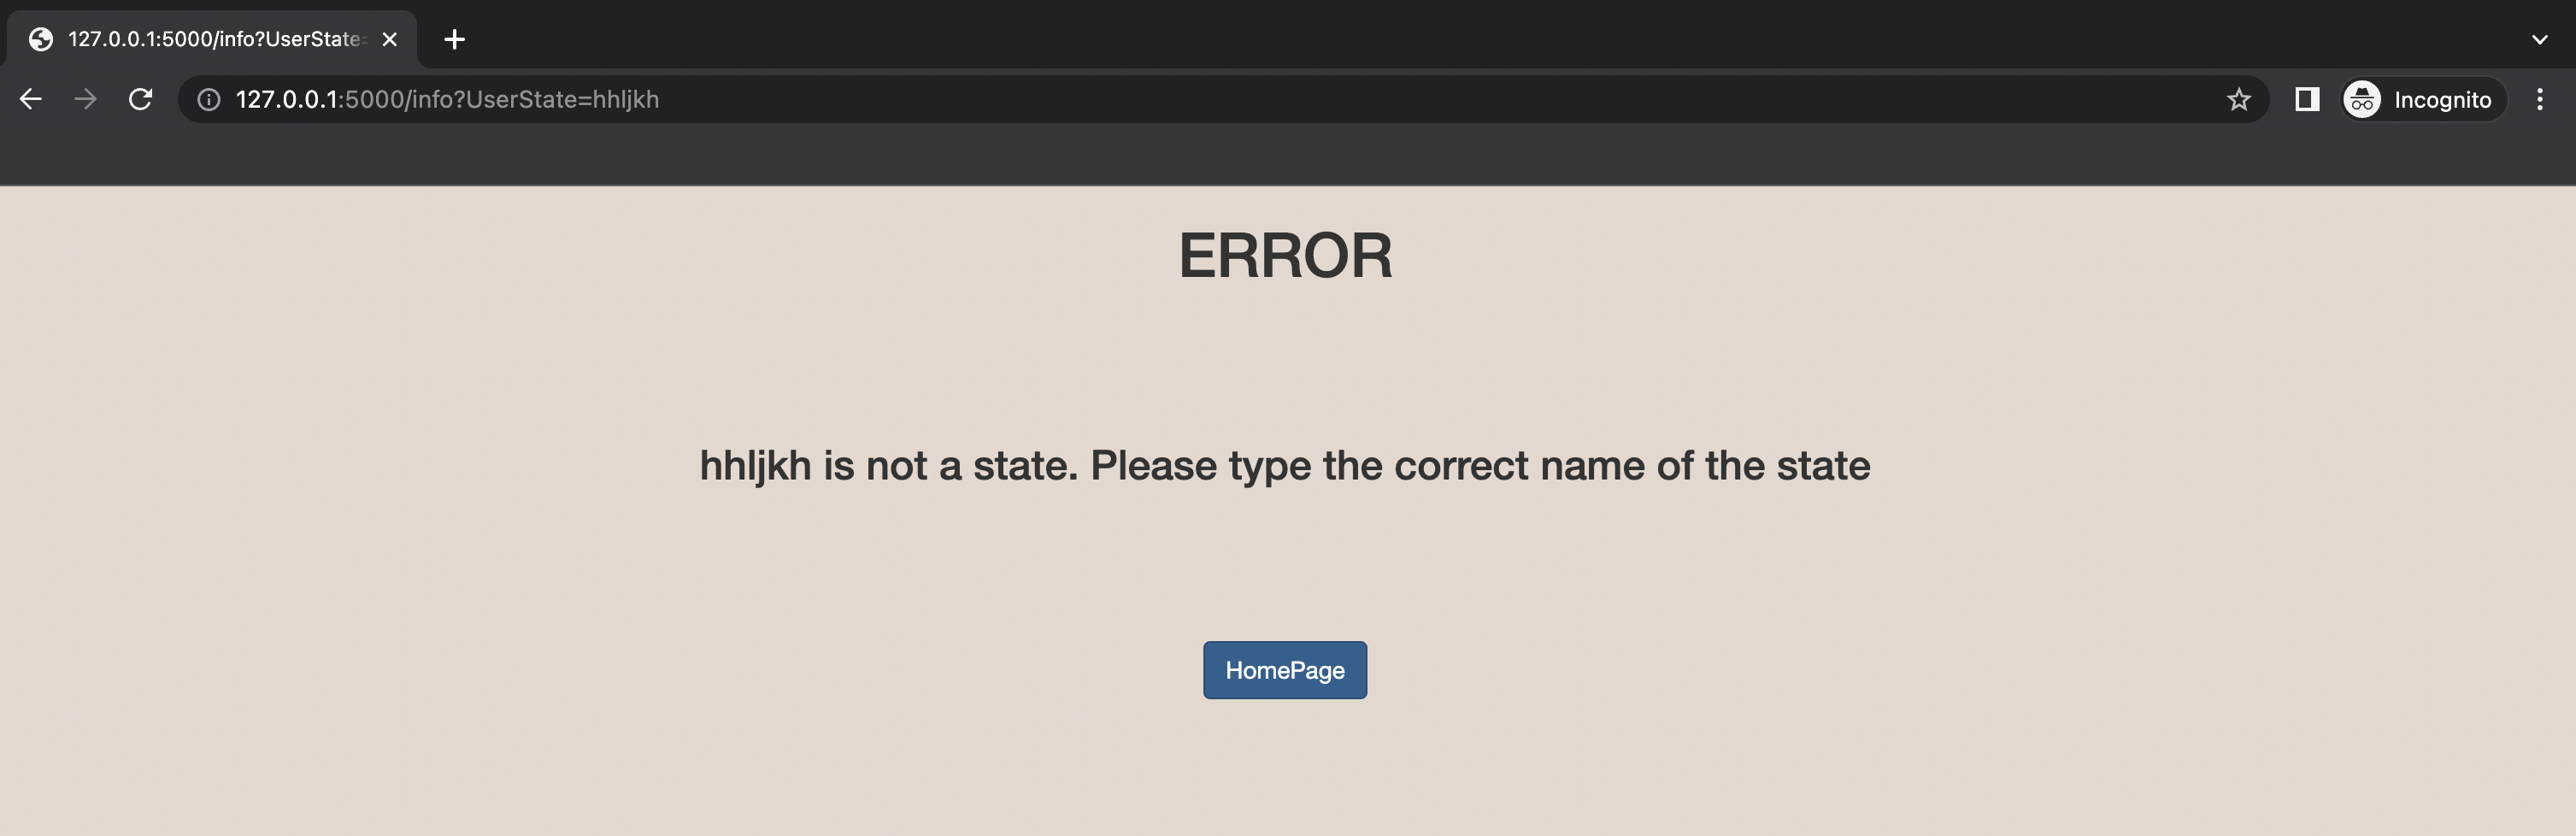

In [50]:
ErrorPage

In [51]:
try: 
    StateData = Image.open("/Users/mahimakaur/Desktop/Computional Methods for Health Informatics/StateData.png") 
except IOError:
    pass

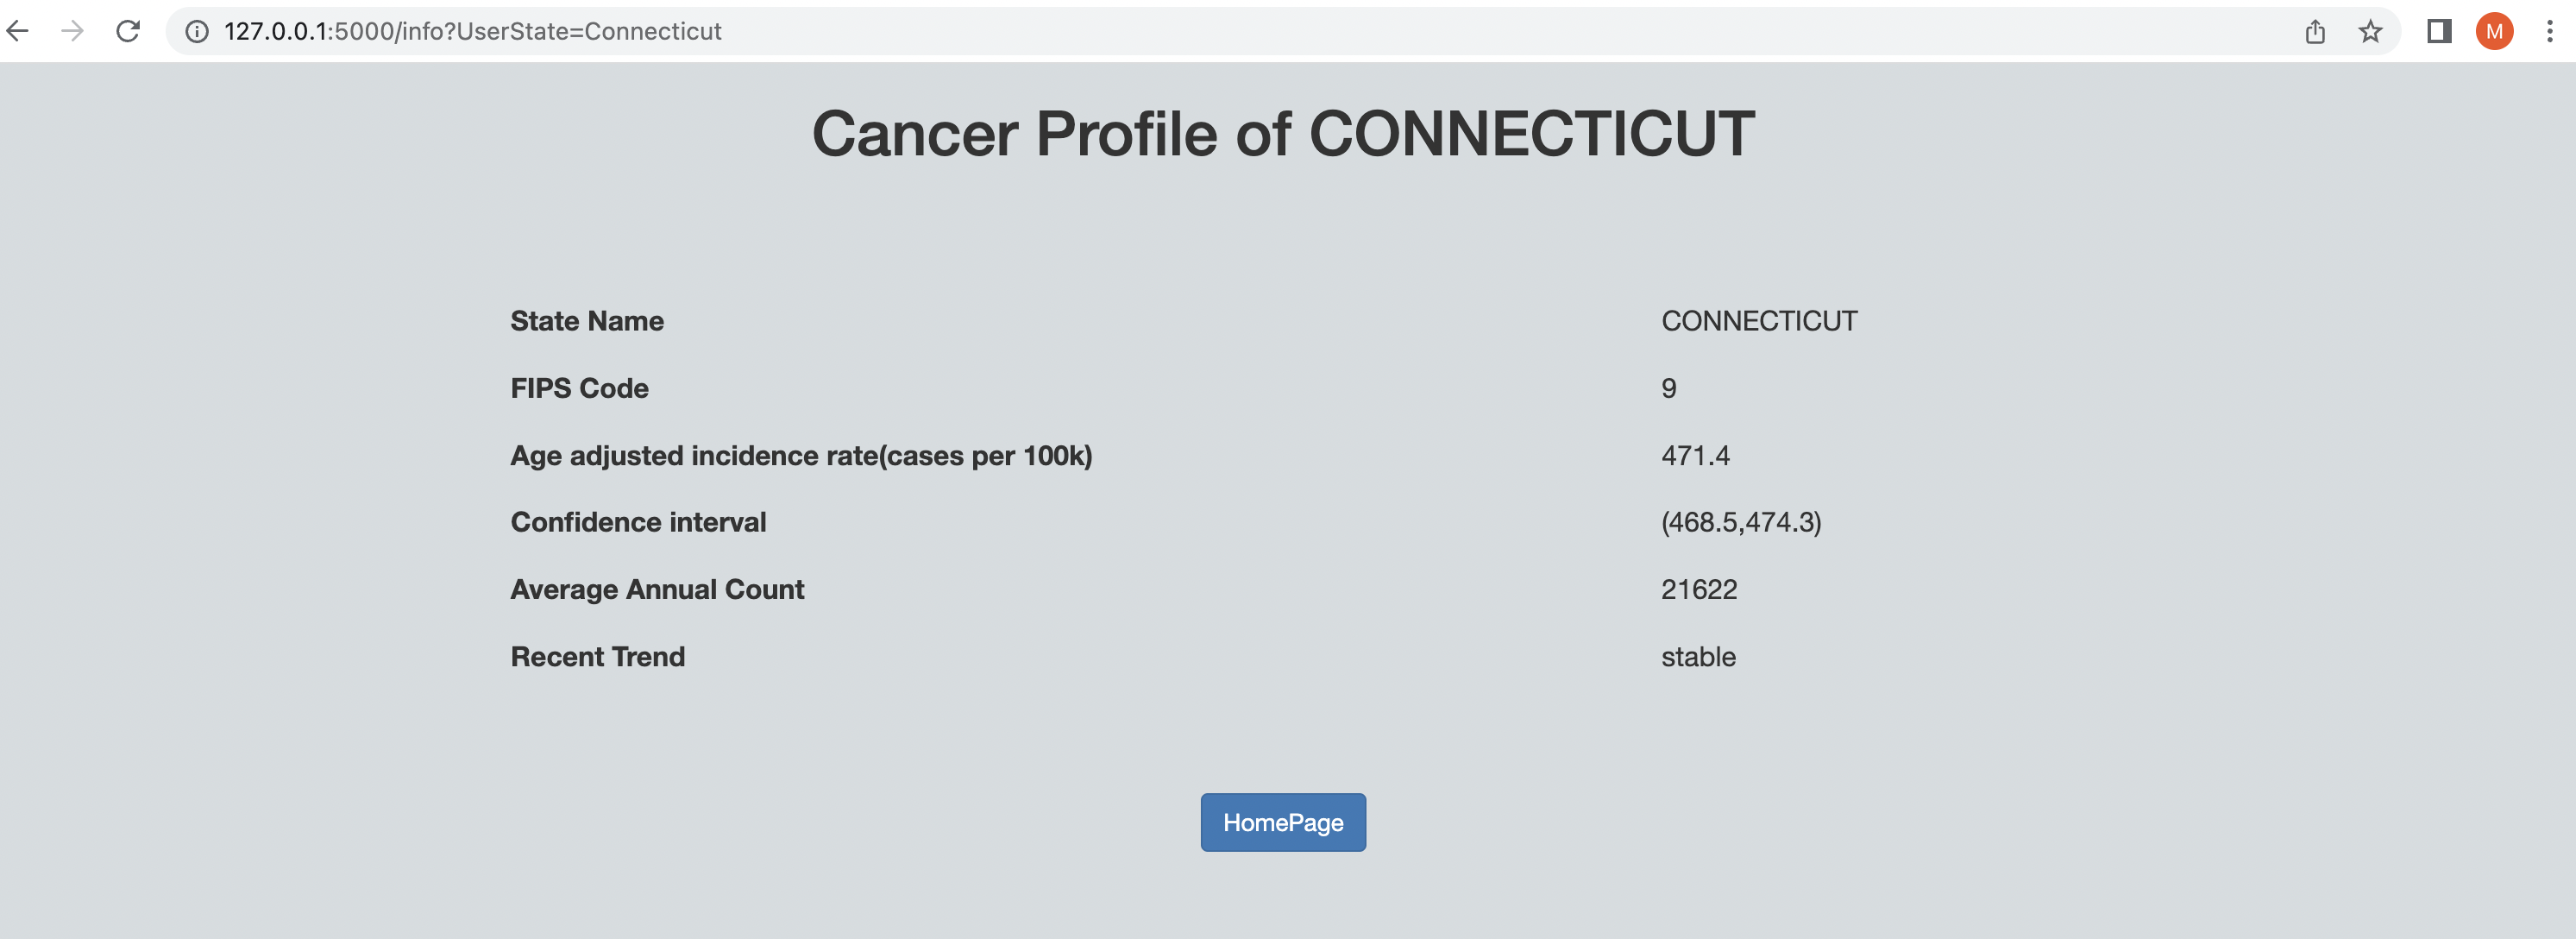

In [52]:
StateData

### Answers 

a. To get the cleaned dataset, I dropped the first 8 rows and the last 24 rows that do not contain relevant data. Then I removed the number and brackets in the each column State. I replaced (*) in Mississippi to Data Suppressed for clearly interpretation of data in the table. I also standardized the FIPS Codes. The cleaned dataset was saved into csv file cleaned_cancer_data.csv (data.to_csv('cleaned_cancer_data.csv', index= True))


b. I had changed the state names into lowercase. Therefore, when someone searches for a particular state, the capitalization won't impact the results. However, if the user puts an incorrect name or state not in the US or misspells the name the website will show can error. The user can go back from the error page by clicking the HomePage button (as shown in the ErrorPage image). 


Advanced interactions: 

- On the homepage I have included a type of dropdown list of the US names i.e when the user starts to enter the state name, suggestions of the state will pop up. It was included to reduce any spelling errors from the user side and enhance the user experience. The same is shown in the image above eg. the user entered 'c' so all the US state name with 'c' will come and the user can select the state of interest.  

- On the information page I have included more data. It also displays FIPS code, age adjusted incidence rate(cases per 100k), confidence interval, average annual count and recent trend in a tabular format. I removed the borders from the table and we can see the parameter highlighted as and when the user selected the particular parameter. This page also has the HomePage button. 